In [1]:
import csv
import pandas as pd

In [2]:
#para todos retornos de execução de códigos sejam apresentados
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Definição das colunas de acordo com o leiaute fornecido pela B3

In [3]:
# nomes das colunas
nm_colunas = [
    'TIPREG',
    'DTPREG',
    'CODBDI',
    'CODNEG',
    'TPMERC',
    'NOMRES',
    'ESPECI',
    'PRAZOT',
    'MODREF',
    'PREABE',
    'PREMAX',
    'PREMIN',
    'PREMED',
    'PREULT',
    'PREOFC',
    'PREOFV',
    'TOTNEG',
    'QUATOT',
    'VOLTOT',
    'PREEXE',
    'INDOPC',
    'DATVEN',
    'FATCOT',
    'PTOEXE',
    'CODISI',
    'DISMES'    
]

#tamanho das colunas
tam_colunas = [
    2,8,2,12,3,12,10,3,4,11,11,11,11,11,11,11,5,18,16,11,1,8,7,7,12,3    
]

len(tam_colunas)
len(nm_colunas)


26

26

# Carregando os arquivos da B3

In [6]:
import glob as gl

#df = pd.read_fwf('../../data/demo.txt',widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1)
#df = pd.read_fwf('..\\..\\data\\2020.txt',widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1)
#df = pd.read_fwf('..\\..\\data\\2020.txt',widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1)

lista_arq = gl.glob('..\\..\\data\\20*.txt')
lista_arq

df = pd.concat([pd.read_fwf(f,widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1) for f in lista_arq])

['..\\..\\data\\2015.TXT',
 '..\\..\\data\\2016.TXT',
 '..\\..\\data\\2017.TXT',
 '..\\..\\data\\2018.TXT',
 '..\\..\\data\\2019.TXT',
 '..\\..\\data\\2020.TXT',
 '..\\..\\data\\2021.TXT']

# Carregando os indicadores econômicos

In [7]:
df_ind = pd.read_excel('..\\..\\data\\dados_economicos_ipeadata.xlsx')
df_ind

,Data,ibovespa,dolar_venda_media,dolar_venda_final,cdi,ipca,igpm,ipca_15,pib_milhoes
0,2014.06,3.76,2.235470,2.2025,0.82,0.40,-0.74,0.47,458516.5
1,2014.07,5.00,2.224648,2.2674,0.94,0.01,-0.61,0.17,481994.0
2,2014.08,9.78,2.265648,2.2396,0.86,0.25,-0.27,0.14,477052.9
3,2014.09,-11.70,2.332868,2.4510,0.90,0.57,0.20,0.39,476520.6
4,2014.10,0.95,2.448261,2.4442,0.94,0.42,0.28,0.48,493304.7
...,...,...,...,...,...,...,...,...,...
100,2022.10,5.74,5.250300,5.2570,1.02,0.59,-0.97,0.16,826638.8
101,2022.11,-3.06,5.274650,5.2941,1.02,0.41,-0.56,0.53,837324.0
102,2022.12,0.50,5.242432,5.2177,1.12,0.62,0.45,0.52,840892.5
103,2023.01,NaN,5.200682,5.0993,1.12,0.53,0.21,0.55,NaN


# Formatando as informações do ativo

In [10]:
#AMAZON
df_amz = df.query("CODNEG=='AMZO34'")
df_amz = df_amz.sort_values(['DTPREG','CODNEG'])
df_amz = df_amz.reset_index()
df_amz['ANOPREG']=df_amz['DTPREG'].apply(str).str[:4]
df_amz.groupby('ANOPREG').count()
df_amz
df_amz.to_csv('..\\..\\data\\AMZ034.csv')
teste=pd.read_csv('..\\..\\data\\AMZ034.csv')


,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
ANOPREG,,,,,,,,,,,,,,,,,,,,,
2015,176,176,176,176,176,176,176,176,0,176,...,176,176,176,176,176,176,176,176,176,176
2016,167,167,167,167,167,167,167,167,0,167,...,167,167,167,167,167,167,167,167,167,167
2017,141,141,141,141,141,141,141,141,0,141,...,141,141,141,141,141,141,141,141,141,141
2018,202,202,202,202,202,202,202,202,0,202,...,202,202,202,202,202,202,202,202,202,202
2019,174,174,174,174,174,174,174,174,0,174,...,174,174,174,174,174,174,174,174,174,174
2020,243,243,243,243,243,243,243,243,0,243,...,243,243,243,243,243,243,243,243,243,243
2021,247,247,247,247,247,247,247,247,0,247,...,247,247,247,247,247,247,247,247,247,247


,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES,ANOPREG
0,51,1,20150102,2,AMZO34,10,AMAZON,DRN,NaN,R$,...,41886000020000,130000,541,4,10000000,0,9999,123100000010,0,2015
1,1471,1,20150105,2,AMZO34,10,AMAZON,DRN,NaN,R$,...,41600000020000,180000,742,4,25000000,0,9999,123100000010,0,2015
2,3011,1,20150106,2,AMZO34,10,AMAZON,DRN,NaN,R$,...,40020000030000,40000,160,4,25000000,0,9999,123100000010,0,2015
3,4671,1,20150107,2,AMZO34,10,AMAZON,DRN,NaN,R$,...,40965000020000,40000,161,4,72000000,0,9999,123100000010,0,2015
4,6350,1,20150108,2,AMZO34,10,AMAZON,DRN,NaN,R$,...,40760000030000,40000,162,6,26000000,0,9999,123100000010,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1039504,1,20211223,2,AMZO34,10,AMAZON,DRN,NaN,R$,...,12426008950000,3934300,4881,1,1780000,0,9999,123100000010,0,2021
1346,1039505,1,20211227,2,AMZO34,10,AMAZON,DRN,NaN,R$,...,12201022130000,11736700,14400,3,9450000,0,9999,123100000010,0,2021
1347,1039506,1,20211228,2,AMZO34,10,AMAZON,DRN,NaN,R$,...,12283017040000,6318800,7738,5,53660000,0,9999,123100000010,0,2021
1348,1039507,1,20211229,2,AMZO34,10,AMAZON,DRN,NaN,R$,...,12329008690000,8185100,10061,5,22470000,0,9999,123100000010,0,2021


# A variável PREULT , indica o último valor do ativo no dia e será a variável de trabalho

In [13]:

df_amz['PREULT']=df_amz['PREULT']/100000
valores = df_amz['PREULT']
valores
valores.shape

0       416.46
1       412.45
2       401.06
3       403.68
4       406.56
         ...  
1345    124.06
1346    122.69
1347    122.46
1348    122.92
1349    120.01
Name: PREULT, Length: 1350, dtype: float64

(1350,)

# Vizualizando os dados

<Figure size 1800x900 with 0 Axes>

([<matplotlib.axis.XTick at 0x1d0be8001f0>,
 [Text(0, 0, '20150102'),
  Text(200, 0, '20160222'),
  Text(400, 0, '20170525'),
  Text(600, 0, '20180803'),
  Text(800, 0, '20190918'),
  Text(1000, 0, '20200803'),
  Text(1200, 0, '20210526')])

Text(0.5, 0, 'Datas')

Text(0, 0.5, 'Preço Final')

Text(0.5, 1.0, 'Histórico de Preço')

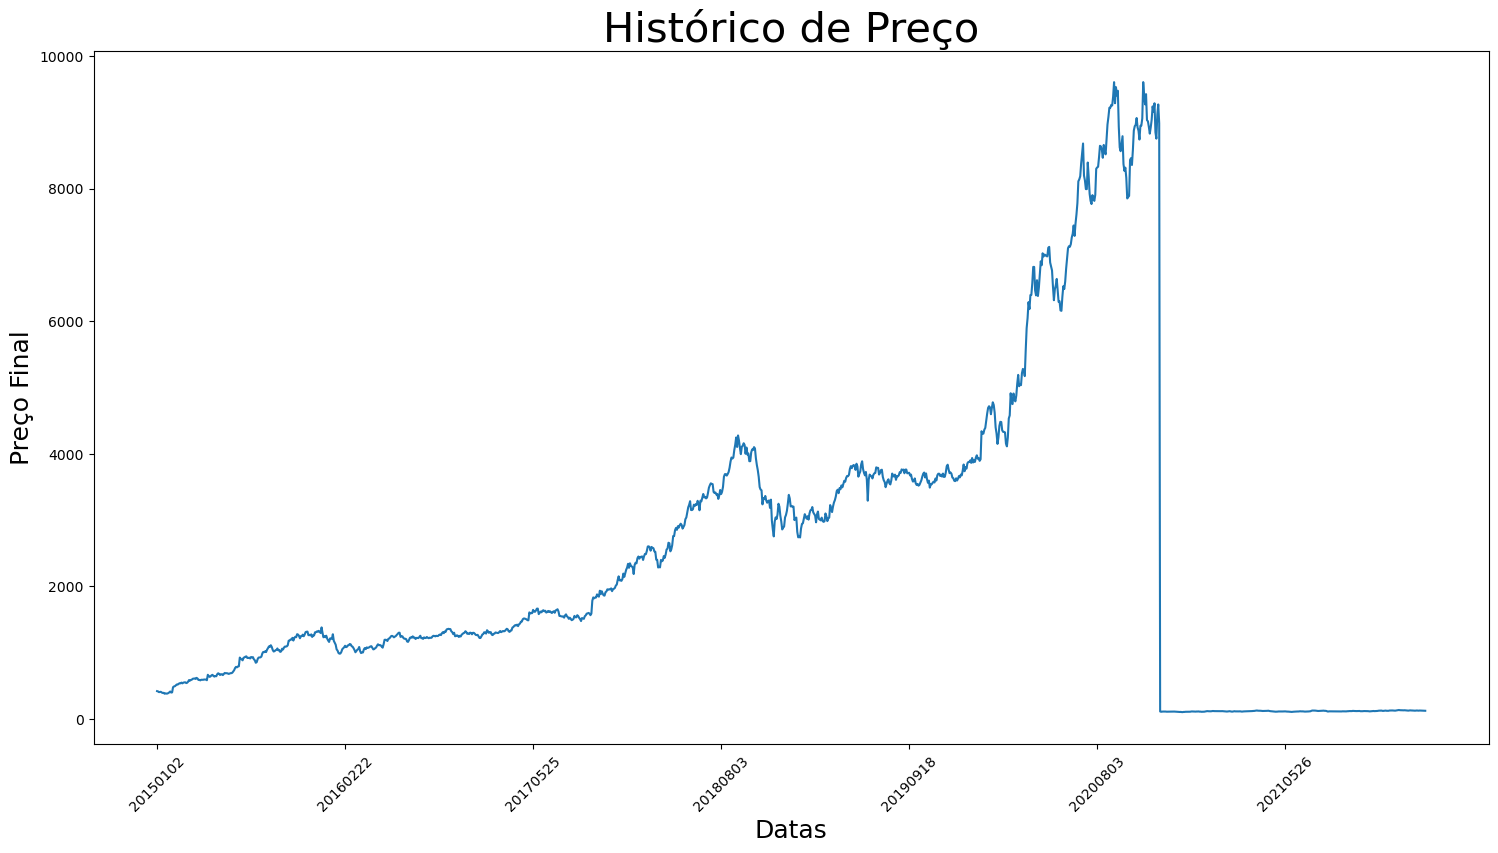

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(df_amz['PREULT'])
plt.xticks(range(0,df_amz.shape[0],200), df_amz['DTPREG'].loc[::200], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Histórico de Preço", fontsize=30)
plt.show()

# A variável dias_input indica o número de dias que será utilizado como informação de entrada para a predição.

## Dessa forma, para que o modelo possa predizer o valor do ativo em uma determinada data, irá utilizar como "input" os valores do ativo correspondentes aos "dias_input" anteriores.

In [16]:
#número de dias utilizados para predição (input)
dias_input = 15

# Separação entre teste e treino

In [17]:
import numpy as np

tam_treino = int(len(valores) * 0.95)
tam_teste = len(valores) - tam_treino
tam_treino
tam_teste

dados_treino, dados_teste = np.array(valores[0:tam_treino]), np.array(valores[tam_treino - dias_input:])
dados_valid = np.array(valores[tam_treino:])

dados_treino.shape,  dados_valid.shape, dados_teste.shape
dados_teste
dados_teste.shape



1643

87

((1643,), (87,), (102,))

array([26.28, 28.56, 28.31, 28.02, 28.52, 28.57, 28.94, 29.34, 28.7 ,
       27.  , 26.98, 26.5 , 26.41, 27.11, 27.43, 27.62, 27.64, 28.13,
       28.45, 27.53, 26.91, 26.88, 26.33, 26.51, 25.51, 24.82, 25.59,
       26.11, 25.96, 26.18, 25.89, 25.16, 24.25, 25.01, 25.93, 26.59,
       26.84, 27.17, 27.31, 27.28, 27.36, 27.69, 28.38, 29.26, 28.73,
       28.7 , 29.13, 29.58, 29.49, 29.88, 29.63, 29.38, 28.41, 28.41,
       27.45, 26.76, 28.6 , 28.91, 28.8 , 28.88, 27.83, 27.9 , 27.26,
       26.24, 26.03, 26.22, 26.65, 26.62, 26.45, 26.54, 27.16, 26.97,
       26.4 , 26.05, 26.76, 27.5 , 28.07, 29.33, 28.53, 29.4 , 29.29,
       30.09, 27.61, 28.61, 29.01, 29.22, 29.57, 29.15, 29.69, 29.58,
       29.36, 28.98, 29.74, 29.11, 28.04, 28.37, 28.16, 28.29, 28.6 ,
       28.87, 28.59, 28.51])

(102,)

# "plotando" o gráfico com séries de treino e input

In [ ]:
import matplotlib.pyplot as plt

intervalo = 90


plt.figure(figsize = (18,9))
plt.plot(df_amz['PREULT'].loc[0:tam_treino], color = 'blue', label = 'treino')
plt.plot(df_amz['PREULT'].loc[tam_treino:], color = 'red', label = 'teste')
plt.xticks(range(0,len(df_amz),intervalo), df_amz['DTPREG'].loc[::intervalo], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Histórico de Preço", fontsize=30)
plt.legend()
plt.show()




# Normalização dos dados


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dados_treino_z = scaler.fit_transform(np.array(dados_treino).reshape(-1,1))
dados_teste_z = scaler.transform(np.array(dados_teste).reshape(-1,1))
dados_valid_z = scaler.transform(np.array(dados_valid).reshape(-1,1))

dados_treino_z.shape
dados_teste_z.shape
dados_valid_z.shape

dados_teste_z.shape
dados_teste_z


(1643, 1)

(102, 1)

(87, 1)

(102, 1)

array([[0.82241251],
       [0.9072971 ],
       [0.89798958],
       [0.88719285],
       [0.90580789],
       [0.9076694 ],
       [0.92144453],
       [0.93633656],
       [0.91250931],
       [0.84921817],
       [0.84847357],
       [0.83060313],
       [0.82725242],
       [0.85331348],
       [0.8652271 ],
       [0.87230082],
       [0.87304542],
       [0.89128816],
       [0.90320179],
       [0.86895011],
       [0.84586746],
       [0.84475056],
       [0.82427401],
       [0.83097543],
       [0.79374535],
       [0.76805659],
       [0.79672375],
       [0.8160834 ],
       [0.81049888],
       [0.8186895 ],
       [0.80789278],
       [0.78071482],
       [0.74683544],
       [0.77513031],
       [0.80938198],
       [0.83395383],
       [0.84326136],
       [0.85554728],
       [0.86075949],
       [0.85964259],
       [0.862621  ],
       [0.87490692],
       [0.90059568],
       [0.93335815],
       [0.91362621],
       [0.91250931],
       [0.92851824],
       [0.945

# Gerando os dados "input" e "target" necessários para treinar o modelo

In [19]:
#treino
input_treino, target_treino = [], []
for i in range(dias_input, len(dados_treino_z)):
    input_treino.append(dados_treino_z[i-dias_input:i])
    target_treino.append(dados_treino_z[i])


#teste
input_teste = []
for i in range(dias_input,len(dados_teste_z)):
    input_teste.append(dados_teste_z[i-dias_input:i]) 
    
#val
input_valid, target_valid = [], []
for i in range(dias_input, len(dados_valid_z)):
    input_valid.append(dados_valid_z[i-dias_input:i])
    target_valid.append(dados_valid_z[i])

#converter tudo pra matriz numpy
input_treino = np.array(input_treino)
target_treino = np.array(target_treino)
input_teste = np.array(input_teste)
input_valid = np.array(input_valid)
target_valid = np.array(target_valid)


input_treino.shape
target_treino.shape
input_teste.shape
input_valid.shape
target_valid.shape

    

(1628, 15, 1)

(1628, 1)

(87, 15, 1)

(72, 15, 1)

(72, 1)

   # Definição dos hiper parâmetros do modelo   

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import SGD

modelo = Sequential()
modelo.add(LSTM(100, return_sequences=True, input_shape=(dias_input, 1)))
#model.add(Dropout(0.3))
modelo.add(LSTM(100, return_sequences=False, input_shape=(dias_input, 1)))
#model.add(Dropout(0.3))
modelo.add(Dense(1))
modelo.compile(loss='mse', optimizer='adam')

modelo.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


# Realizando o treinamento do modelo

In [21]:
hist_modelo = modelo.fit(input_treino, target_treino, validation_data = (input_valid, target_valid), epochs=3, batch_size=2)



Epoch 1/3
814/814 [==============================] - 20s 18ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 2/3
814/814 [==============================] - 13s 16ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 3/3
814/814 [==============================] - 13s 16ms/step - loss: 9.5609e-04 - val_loss: 8.4048e-04


# Análise do histórico de treinamento

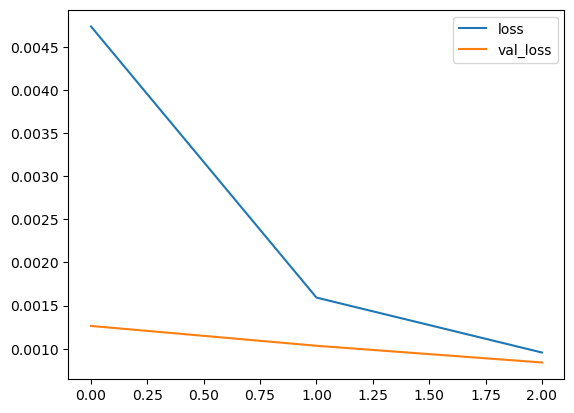

In [22]:
import matplotlib.pyplot as plt

plt.plot(hist_modelo.history["loss"], label='loss')
plt.plot(hist_modelo.history["val_loss"], label='val_loss')
plt.legend()

# Realização da predição dos dados de teste

In [23]:
resultado_z = modelo.predict(input_teste)



resultado_z.shape
input_teste.shape
dados_teste_z.shape
resultado_z

3/3 [==============================] - 1s 13ms/step


(87, 1)

(87, 15, 1)

(102, 1)

array([[0.84565604],
       [0.86466956],
       [0.87545663],
       [0.887162  ],
       [0.8985603 ],
       [0.88744485],
       [0.8628777 ],
       [0.84378433],
       [0.8250323 ],
       [0.8184917 ],
       [0.8024707 ],
       [0.7801848 ],
       [0.7793232 ],
       [0.79487824],
       [0.8074777 ],
       [0.8181679 ],
       [0.8184283 ],
       [0.8024589 ],
       [0.7725307 ],
       [0.7633363 ],
       [0.77970254],
       [0.8092259 ],
       [0.8353611 ],
       [0.85481775],
       [0.8650632 ],
       [0.8661406 ],
       [0.8639723 ],
       [0.86634296],
       [0.8805126 ],
       [0.9074142 ],
       [0.91654074],
       [0.9153137 ],
       [0.9181784 ],
       [0.92829233],
       [0.93399847],
       [0.94268817],
       [0.9433708 ],
       [0.93662107],
       [0.91298664],
       [0.8952036 ],
       [0.87044734],
       [0.8438903 ],
       [0.861749  ],
       [0.8919407 ],
       [0.9123672 ],
       [0.9224647 ],
       [0.90517604],
       [0.887

# Análise dos resultados

In [24]:
resultado = scaler.inverse_transform(resultado_z)
real = scaler.inverse_transform(dados_teste_z)
real = dados_teste[dias_input-1:]


resultado.shape
real.shape
dados_teste.shape
dados_teste_z.shape

(87, 1)

(88,)

(102,)

(102, 1)

<Figure size 1800x900 with 0 Axes>

([<matplotlib.axis.XTick at 0x225033f09d0>,
 [Text(0, 0, '20210825'),
  Text(5, 0, '20210901'),
  Text(10, 0, '20210909'),
  Text(15, 0, '20210916'),
  Text(20, 0, '20210923'),
  Text(25, 0, '20210930'),
  Text(30, 0, '20211007'),
  Text(35, 0, '20211015'),
  Text(40, 0, '20211022'),
  Text(45, 0, '20211029'),
  Text(50, 0, '20211108'),
  Text(55, 0, '20211116'),
  Text(60, 0, '20211123'),
  Text(65, 0, '20211130'),
  Text(70, 0, '20211207'),
  Text(75, 0, '20211214'),
  Text(80, 0, '20211221'),
  Text(85, 0, '20211229')])

Text(0.5, 0, 'Datas')

Text(0, 0.5, 'Preço Final')

Text(0.5, 1.0, 'Projeção de Preço Petrobras')

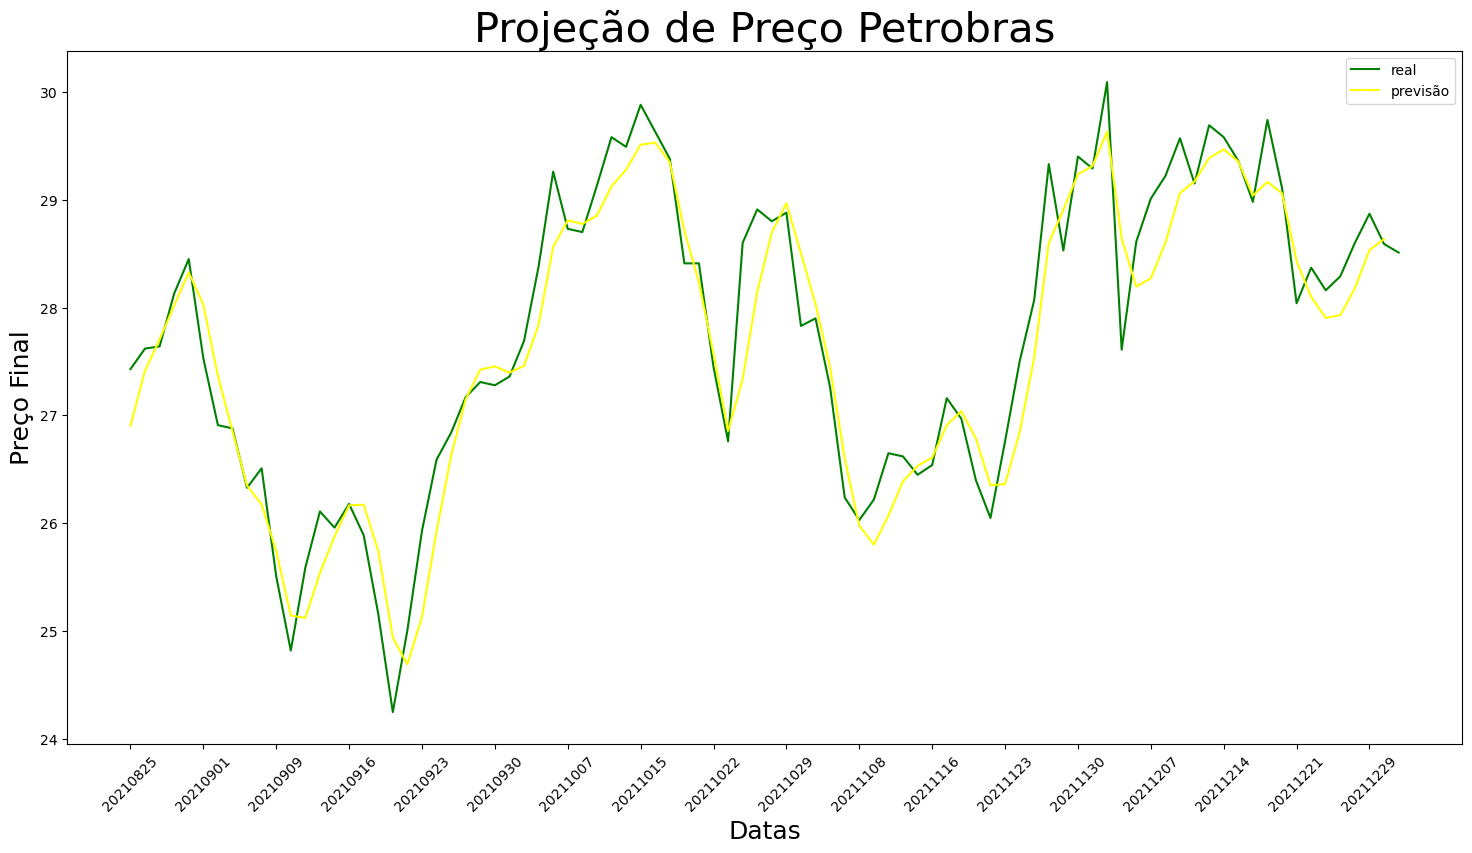

In [25]:



plt.figure(figsize = (18,9))
#plt.plot(dados_teste[:len(dados_teste)-dias_input], color = 'green', label = 'real')
plt.plot(real, color = 'green', label = 'real')
plt.plot(resultado, color = 'yellow', label = 'previsão')
#plt.xticks(range(0, len(dados_teste), 50), df_amz['Date'].iloc[- len(real)::50], rotation=45)
plt.xticks(range(0,len(input_teste),5), df_amz['DTPREG'].iloc[-len(input_teste)::5], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Projeção de Preço Petrobras", fontsize=30)
plt.legend()
plt.show()

# gerando as informações para predição das acões da Amazon

In [26]:
df_amz['PREULT']=df_amz['PREULT']/100000

In [27]:
valores = df_amz['PREULT']
df_amz['PREULT']
valores

0       416.46
1       412.45
2       401.06
3       403.68
4       406.56
         ...  
1345    124.06
1346    122.69
1347    122.46
1348    122.92
1349    120.01
Name: PREULT, Length: 1350, dtype: float64

0       416.46
1       412.45
2       401.06
3       403.68
4       406.56
         ...  
1345    124.06
1346    122.69
1347    122.46
1348    122.92
1349    120.01
Name: PREULT, Length: 1350, dtype: float64

In [30]:
valores = df_amz['PREULT']
df_amz['PREULT']



dados_teste = np.array(valores)
dados_teste_z = scaler.transform(np.array(dados_teste).reshape(-1,1))

#teste
input_teste = []
for i in range(dias_input,len(dados_teste_z)):
    input_teste.append(dados_teste_z[i-dias_input:i]) 
input_teste = np.array(input_teste)

resultado_z = modelo.predict(input_teste)

resultado = scaler.inverse_transform(resultado_z)
real = scaler.inverse_transform(dados_teste_z)

real = dados_teste[dias_input-1:]
resultado




0       416.46
1       412.45
2       401.06
3       403.68
4       406.56
         ...  
1345    124.06
1346    122.69
1347    122.46
1348    122.92
1349    120.01
Name: PREULT, Length: 1350, dtype: float64

42/42 [==============================] - 1s 12ms/step


array([[182.78415 ],
       [181.42801 ],
       [181.60603 ],
       ...,
       [100.804565],
       [100.316475],
       [100.446915]], dtype=float32)

<Figure size 1800x900 with 0 Axes>

([<matplotlib.axis.XTick at 0x22565936160>,
 [Text(0, 0, '20150127'),
  Text(60, 0, '20150626'),
  Text(120, 0, '20151015'),
  Text(180, 0, '20160211'),
  Text(240, 0, '20160525'),
  Text(300, 0, '20161020'),
  Text(360, 0, '20170322'),
  Text(420, 0, '20170815'),
  Text(480, 0, '20180122'),
  Text(540, 0, '20180515'),
  Text(600, 0, '20180829'),
  Text(660, 0, '20181207'),
  Text(720, 0, '20190418'),
  Text(780, 0, '20190911'),
  Text(840, 0, '20191220'),
  Text(900, 0, '20200330'),
  Text(960, 0, '20200626'),
  Text(1020, 0, '20200922'),
  Text(1080, 0, '20201217'),
  Text(1140, 0, '20210322'),
  Text(1200, 0, '20210617'),
  Text(1260, 0, '20210913'),
  Text(1320, 0, '20211209')])

Text(0.5, 0, 'Datas')

Text(0, 0.5, 'Preço Final')

Text(0.5, 1.0, 'Projeção de Preço')

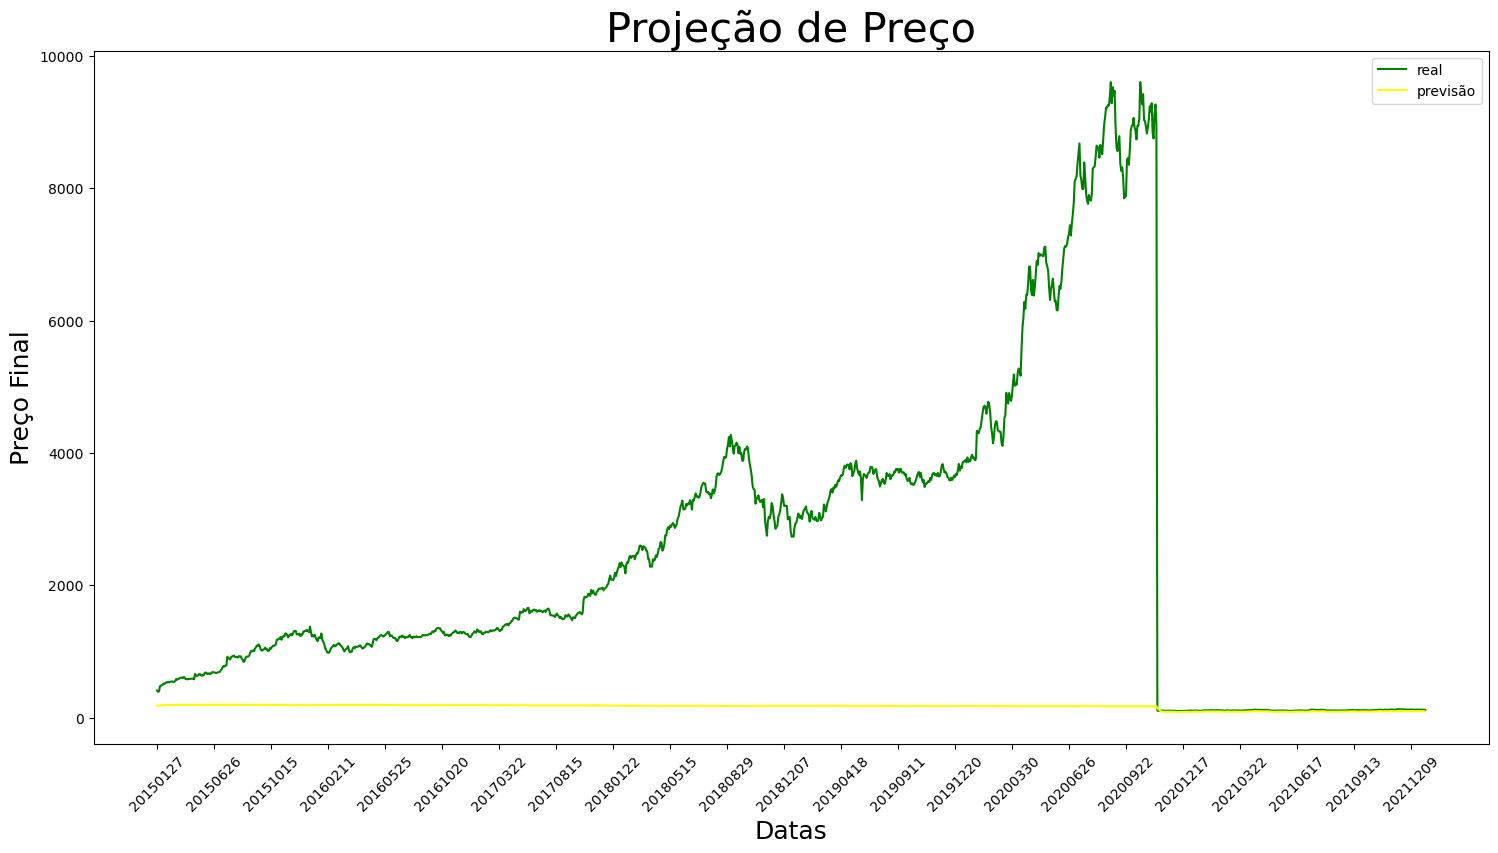

In [29]:
plt.figure(figsize = (18,9))
#plt.plot(dados_teste[:len(dados_teste)-dias_input], color = 'green', label = 'real')
plt.plot(real, color = 'green', label = 'real')
plt.plot(resultado, color = 'yellow', label = 'previsão')
#plt.xticks(range(0, len(dados_teste), 50), df_amz['Date'].iloc[- len(real)::50], rotation=45)
plt.xticks(range(0,len(input_teste),60), df_amz['DTPREG'].iloc[-len(input_teste)::60], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Projeção de Preço", fontsize=30)
plt.legend()
plt.show()

# realizando a predição dia a dia para atualizar os inputs

In [ ]:
input_pred = input_teste[0:1].copy() #pega o primeiro dia do conjunto de teste
predicoes = []
for i in range(len(dados_teste)):
    
    resultado = modelo.predict(input_pred)
    predicoes.append(resultado[0, 0])
    
    #remove primeiro preço da sequência
    temp = np.delete(input_pred[0], 0)

    #insere último preço da sequência
    temp = np.append(temp, resultado)
    
    #recoloca no formato tensorflow
    input_pred[0] = np.reshape(temp, (dias_input, 1))
    
predicoes = scaler.inverse_transform(np.array(predicoes).reshape(-1, 1))

predicoes

In [ ]:
len(dados_teste)

plt.figure(figsize = (18,9))
plt.plot(dados_teste, color = 'green', label = 'real')
plt.plot(predicoes, color = 'red', label = 'previsão')
plt.xticks(range(0, len(dados_teste), 10), df_amz['DTPREG'].iloc[-len(dados_teste)::10], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Projeção de Preço", fontsize=30)
plt.legend()
plt.show()